In [98]:
import sys
import os
import yaml
from pathlib import Path

try:
    if not(changed) :
        raise Exception("changed")
except:
    changed = True
    sys.path.append("../")
    os.chdir("../")

In [99]:
from transformers import AutoModel

esm2 = AutoModel.from_pretrained("facebook/esm2_t6_8M_UR50D")

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [116]:
from transformers import AutoTokenizer
import numpy as np
import torch

gt = np.load("./data/token_embedding_dict.npy", allow_pickle=True)[()]

for k in gt.keys():
    print(k)
    # print(gt[k], len(gt[k]))
    # print(esm2(torch.LongTensor(gt[k])), torch.ones(len(gt[k])).unsqueeze(0))
    # break

UNK
847680145
3855292234
3753451792
864666390
3925650716
3737048253
3892129619
3466667646
4237357508
2246728737
3975275337
864674487
2076190208
3217380708
1135286194
3218693969
994485099
2353112200
951226070
2334217755
849271271
1888282771
847433064
3386370901
963387474
1016841875
2128726252
4113662558
1569849257
1034915799
3542456614
2245384272
1173125914
1167322652
2246699815
3315826729
864942730
1510328189
847961216
1790668568
3918336191
2115476908
4003049590
2245273601
1674219510
864662311
1542633699
781912670
1369588494
2635303940
3537119515
2309124039
1822332700
3545365497
1016845826
847694221
1302508605
2976816164
2968968094
516041383
2976033787
2999514534
517457164
1609040637
930556050
3976348087
3026394695
26234434
3818546315
848128881
3121777292
603510687
1510461303
2257970297
2092489639
3346582092
3796841743
98513984
480680885
3351556771
1791250428
2246340824
3452535345
4269929640
422715066
3124581743
3491109101
4189401863
854632749
3777168895
2041434490
3118255683
584893129

In [102]:
# Read a random graph:

raw_path_all = Path("data/raw/")

graphs = list(raw_path_all.glob("*.graph"))
np.random.seed(42)
idx = np.random.randint(len(graphs))
raw_path = graphs[idx]

edge_index = []
x = []
with open(raw_path, "r") as f:
    next(f)
    for line in f:
        if line != "\n":
            edge = (*map(int, line.split()),)
            edge_index.append(edge)
        else:
            break
    next(f)
    for line in f:  # get mol2vec features:
        substruct_id = line.strip().split()[-1]
        if substruct_id in gt.keys():
            x.append(gt[substruct_id])
        else:
            x.append(gt["UNK"])

edge_index, x
# return torch.LongTensor(edge_index).T, torch.FloatTensor(x)

([(0, 1),
  (1, 0),
  (1, 2),
  (2, 1),
  (2, 3),
  (3, 2),
  (3, 4),
  (4, 3),
  (4, 5),
  (5, 4),
  (5, 6),
  (6, 5),
  (6, 7),
  (7, 6),
  (7, 8),
  (8, 7),
  (8, 9),
  (9, 8),
  (7, 10),
  (10, 7),
  (10, 11),
  (11, 10),
  (11, 12),
  (12, 11),
  (12, 13),
  (13, 12),
  (13, 14),
  (14, 13),
  (14, 15),
  (15, 14),
  (15, 16),
  (16, 15),
  (14, 17),
  (17, 14),
  (17, 18),
  (18, 17),
  (18, 19),
  (19, 18),
  (18, 20),
  (20, 18),
  (20, 21),
  (21, 20),
  (20, 22),
  (22, 20),
  (22, 23),
  (23, 22),
  (11, 24),
  (24, 11),
  (24, 25),
  (25, 24),
  (24, 26),
  (26, 24),
  (26, 27),
  (27, 26),
  (4, 28),
  (28, 4),
  (28, 29),
  (29, 28),
  (28, 30),
  (30, 28),
  (30, 31),
  (31, 30),
  (30, 32),
  (32, 30),
  (32, 33),
  (33, 32),
  (32, 2),
  (2, 32),
  (26, 6),
  (6, 26),
  (22, 13),
  (13, 22)],
 [array([ 9.90705006e-03,  9.62135792e-02,  5.78464530e-02,  2.73397744e-01,
         -3.05858869e-02,  3.69054228e-01,  9.07180905e-02,  4.69587833e-01,
          2.33439565e-01,

In [103]:
from src.trainer import BaseTrainer
from main import MODELS_DICT

config_name = "baseline"
config_path = Path("./configs/") / (config_name + ".yaml")

config = yaml.load(open(config_path), Loader=yaml.FullLoader)
config = config["default"]

config["name_model"] = config_name
config["model_object"] = MODELS_DICT[config["name_model"]]
config["is_debug"] = True

trainer = BaseTrainer(**config)

In [104]:
train_dataset = trainer.train_dataset
val_dataset = trainer.val_dataset
test_cids_dataset = trainer.test_cids_dataset
test_text_dataset = trainer.test_text_dataset

idx = 0
x = train_dataset[idx]

In [105]:
print(f"Length of training dataset: {len(train_dataset)}")
print(f"Length of validation dataset: {len(val_dataset)}")
print(f"Length of test dataset: {len(test_cids_dataset)}")

Length of training dataset: 26408
Length of validation dataset: 3301
Length of test dataset: 3301


In [106]:
test_cids, test_text = test_cids_dataset[0], test_text_dataset[0]
test_cids, test_text

(Data(x=[1, 300], edge_index=[0]),
 {'input_ids': tensor([  101,  1060,  4630, 24572,  8189,  2618,  2003,  1037, 21864,  3630,
           4179,  8202, 24755, 15185, 11636, 23943,  2618,  2008,  2003,  1996,
           9530,  9103,  5867,  2918,  1997,  1060,  4630, 24572, 18595,  2278,
           5648,  1010,  4663,  2011,  2139, 21572,  2669,  3370,  1997,  1996,
           2482,  8758,  2100,  2177,  1012,  2009,  2038,  1037,  2535,  2004,
           2019,  4111, 18804, 14956,  4221,  1012,  2009,  2003,  1037,  9530,
           9103,  5867,  2918,  1997,  1037,  1060,  4630, 24572, 18595,  2278,
           5648,  1012,   102,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,

In [107]:
train_dataset.description[1]

{25244316: 'UDP-alpha-D-galactofuranose(2-) is a UDP-D-galactofuranose(2-) in which the anomeric centre of the galactofuranose moiety has alpha-configuration. It is a conjugate base of an UDP-alpha-D-galactofuranose.',
 46931111: '2-acetamido-2-deoxy-3-O-(4-deoxy-alpha-L-threo-hex-4-enopyranosyluronate)-6-O-sulfonato-D-galactopyranose(2-) is an organosulfate oxoanion resulting from the removal of a proton from both the carboxy group and the sulfate group of 2-acetamido-2-deoxy-3-O-(4-deoxy-alpha-L-threo-hex-4-enopyranosyluronic acid)-6-O-sulfo-D-galactopyranose arising from deprotonation of carboxy and sulfate groups; major species at pH 7.3. It is an organosulfate oxoanion, a carbohydrate acid derivative anion and a monocarboxylic acid anion. It is a conjugate base of a 2-acetamido-2-deoxy-3-O-(4-deoxy-alpha-L-threo-hex-4-enopyranosyluronic acid)-6-O-sulfo-D-glucopyranose.',
 743: 'Glutaric acid is an alpha,omega-dicarboxylic acid that is a linear five-carbon dicarboxylic acid. It has

In [108]:
trainer.tokenizer.decode(test_text["input_ids"])

'[CLS] xanthurenate is a quinolinemonocarboxylate that is the conjugate base of xanthurenic acid, obtained by deprotonation of the carboxy group. it has a role as an animal metabolite. it is a conjugate base of a xanthurenic acid. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

In [109]:
x["attention_mask"]
x["edge_index"].shape

torch.Size([2, 76])

In [110]:
x["attention_mask"], x["input_ids"]

(tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 tensor([[  101, 20904,  2361,  1011,  6541,  1011,  1040,  1011, 16122,  6593,
          11253,  4648, 15460,  2063,  

In [111]:
(x["attention_mask"] == 1).sum(), (x["input_ids"] != 0).sum()

(tensor(81), tensor(81))

In [112]:
x

Data(x=[36, 300], edge_index=[2, 76], input_ids=[1, 256], attention_mask=[1, 256])

In [113]:
x["x"][0]

tensor([ 4.5009e-01, -7.7423e-02,  3.7848e-01,  1.4942e-01,  2.1135e-02,
         6.0997e-02, -1.7651e-01, -4.3749e-02,  3.2953e-01,  8.9268e-02,
        -8.8003e-02, -1.4672e-04,  6.1920e-02, -2.9440e-03,  2.8576e-01,
        -3.9831e-02,  5.7881e-04,  1.6809e-01,  1.8248e-01,  1.3454e-02,
         3.9979e-01,  1.2436e-01,  8.4686e-02,  2.6228e-01, -2.2388e-01,
         1.3579e-01,  5.1962e-02,  7.2590e-02, -1.0685e-01,  9.1158e-02,
         3.6620e-02,  1.3122e-01, -1.4300e-01,  5.7040e-02,  1.5064e-01,
         1.8036e-01, -1.1959e-01,  7.5763e-02, -8.5833e-02, -2.0475e-01,
        -1.0265e-02,  1.7638e-02,  2.6032e-02, -5.9443e-02, -2.0738e-01,
        -6.9848e-02, -4.2923e-01,  2.2658e-02, -1.3957e-01,  6.7357e-02,
        -4.5396e-02, -1.2946e-01,  2.3174e-01, -3.5148e-01,  1.4238e-02,
        -8.9527e-02,  3.4568e-02,  3.1473e-01, -5.3005e-02,  6.6727e-02,
         1.4181e-01,  3.4066e-01, -1.4526e-01, -2.9522e-02,  1.7520e-01,
        -4.5157e-01,  7.1098e-02,  2.7813e-02,  7.2

[CLS] udp - alpha - d - galactofuranose ( 2 - ) is a udp - d - galactofuranose ( 2 - ) in which the anomeric centre of the galactofuranose moiety has alpha - configuration. it is a conjugate base of an udp - alpha - d - galactofuranose. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

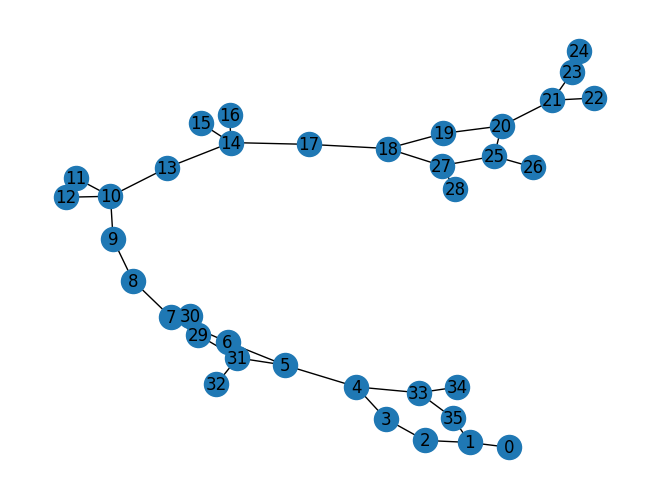

In [114]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

seed = 42
G = to_networkx(x, to_undirected=True)
# Plot G
nx.draw(G, with_labels=True)
print(trainer.tokenizer.decode(x["input_ids"][0]))